# chapter 04 | 분류

In [35]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 플롯 스타일
# plt.style.use('seaborn')
# 한글 폰트, 마이너스 표시
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)


## 02. 결정트리
```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)[source]
```

- `max_depth` : 트리의 깊이
- `min_samples_split` : 최소 분할 샘플수
- `min_samples_leaf` : 리프노드가 가지는 최소 샘플수
- `max_features` : 최적의 분할을 위해 고려하는 최대 피처 개수 ('auto'=sqrt)
- `max_leaf_nodes` : 최대 리프노드 개수

### graphviz 시각화

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

iris = load_iris()
print(dir(iris))
data = iris.data
target = iris.target
print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=156)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names = iris.target_names, 
              feature_names = iris.feature_names, impurity=True, filled=True)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(150, 4) (150,)
(112, 4) (38, 4) (112,) (38,)


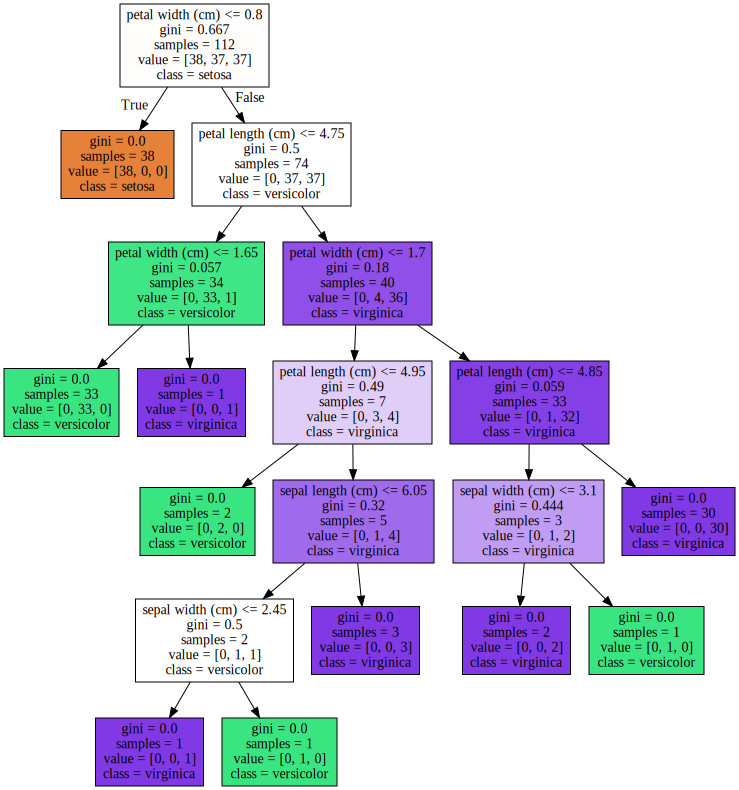

In [37]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[0.00803635 0.03125249 0.40574827 0.55496288]
sepal length (cm) 0.008
sepal width (cm) 0.0313
petal length (cm) 0.4057
petal width (cm) 0.555


<AxesSubplot:>

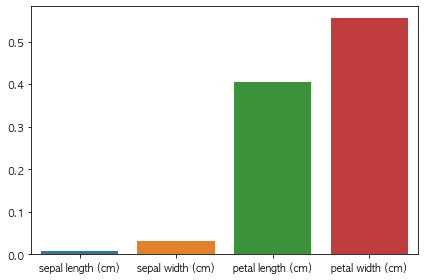

In [38]:
print(tree.feature_importances_)
for name, value in zip(iris.feature_names, tree.feature_importances_):
    print(name, np.round(value,4))
    
# 시각화 방법 1. matplotlib bar
val_dict = dict(zip(iris.feature_names, tree.feature_importances_))
plt.bar(x=list(val_dict.keys()), height=list(val_dict.values()))
plt.tight_layout()

# 시각화 방법 2. seaborn
sns.barplot(y = tree.feature_importances_, x = iris.feature_names)
# print(tree.feature_importances_)
# print(iris.feature_names)

### 결정 트리 과적합 (Overfitting)
- `make_classification` : 분류를 위한 테스트용 데이터, 피처 데이터 세트와 레이블 데이터 세트를 반환
- `visualize_boundary` : 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타냄

(100, 2) (100,)


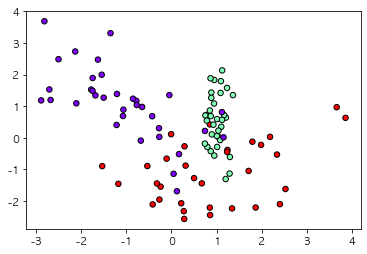

In [39]:
from sklearn.datasets import make_classification

X_features, y_labels = make_classification(n_features=2, n_informative=2, n_redundant=0,
                                         n_classes=3, n_clusters_per_class=1, random_state=0)

print(X_features.shape, y_labels.shape)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=30, edgecolors='k', cmap=plt.cm.rainbow)

In [40]:
# code from wikibooks github
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

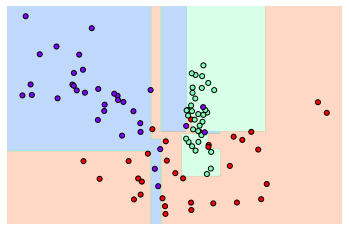

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(tree, X_features, y_labels)

In [9]:
! pip install pydotplus

In [26]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

tree = DecisionTreeClassifier().fit(X_features, y_labels)

# 방법1.png 저장
dot_data = export_graphviz(tree, out_file=None, feature_names=None, class_names=True,
               filled=True, impurity=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('30,30!')
pydot_graph.write_png('tree_default.png')

# 방법2. cell에 표시
# export_graphviz(tree, out_file='tree_default.dot', filled=True, impurity=True)
# with open("tree_default.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

True

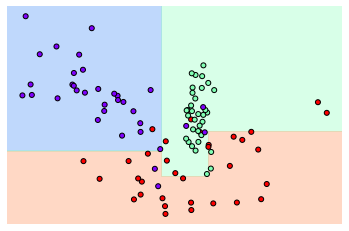

In [11]:
tree = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(tree, X_features, y_labels)

In [12]:
# png 저장
dot_data = export_graphviz(tree, out_file=None, feature_names=None, class_names=True,
               filled=True, impurity=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('30,30!')
pydot_graph.write_png('tree_min_samples_leaf.png')

True

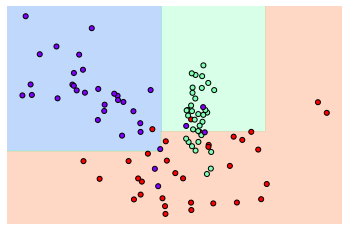

In [29]:
tree = DecisionTreeClassifier(max_leaf_nodes=5).fit(X_features, y_labels)
visualize_boundary(tree, X_features, y_labels)

In [30]:
# png 저장
dot_data = export_graphviz(tree, out_file=None, feature_names=None, class_names=True,
               filled=True, impurity=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('30,30!')
pydot_graph.write_png('tree_max_leaf_nodes.png')

True

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [50]:
PATH = './human_activity/'
os.listdir(PATH)

['.DS_Store',
 'test',
 'features.txt',
 'activity_labels.txt',
 'features_info.txt',
 'train',
 'README.txt']

In [60]:
feature_name_df = pd.read_csv(PATH + "features.txt", sep='\s+',
                             header=None, names = ['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print(len(feature_name))
print(feature_name[:10])

561
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [63]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [67]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [101]:
feature_dup_df = pd.DataFrame(feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'], dtype=int)
new_feature_name_df = pd.merge(feature_name_df, feature_dup_df, 
                               left_on=feature_name_df.index, right_on=feature_dup_df.index,
                               how='outer' )

new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x :
                                                                                 x[0]+"_"+str(x[1]) 
                                                                                 if x[1]>0
                                                                                 else x[0], axis=1)
#'key_0', 'column_index', 'column_name', 'dup_cnt', 'new_column_name'
new_feature_name_df = new_feature_name_df[['column_index','column_name']]
new_feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [ ]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

## 03. 앙상블 학습

이미지, 영상, 음성 등 비정형 데이터의 분류 → 딥러닝  
대부분의 정형 데이터 분류 → 앙상블

#### 앙상블의 학습 유형
- 보팅(Voting), 배깅(Bagging), 부스팅(Boosting) + 스태킹(stacking)
- 보팅(Voting) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정, 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합
- 배깅(Bagging) : 보팅과 마찬가지로 여러 개의 분류기의 다수결에 따라 최종 예측 결과를 결정, 모두 같은 알고리즘을 가진 분류기를 결합하지만 데이터 샘플링을 서로 다르게, 중첩을 허용 (예) 랜덤포레스트
    - 개별 분류기에 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 부름
- 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터 대해서 올바르게 예측할 수 있도록 다음 분류기에 가중치를 부여하면서 학습과 예측을 진행 (예) XGBoost, LightGBM

*Q. 보팅은 원본 데이터 셋의 모든 데이터를 사용하는 것인가?  
A. 모든 데이터를 사용한다.*

#### 보팅 유형
- 하드 보팅(Hard Voting) : 다수결
- 소프트 보팅(Soft Voting) : 분류기들의 레이블 값 결정 확률(proba)을 모두 더하여 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정, 하드 보팅보다 예측 성능이 좋아서 일반적인 보팅 방식으로 사용

### 보팅 분류기 (Voting Classifier)
#### 인자
- estimator : 모델 입력
- voting : 보팅 방식 설정 (soft/hard)

#### 주의할 점
- 여러 개의 base classifier을 결합한다고 해서 무조건 base classifier보다 예측 성능이 향상되지는 않음
- 데이터의 특성과 분포 등 다양한 요건에 따라 다름
> ML 모델의 성능은 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 평가요소

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

In [ ]:

knn = KNeighborsClassifier()
lr = LogisticRegression()
vo = VotingClassifier(estimators = [('knn', knn), ('lr', lr)], voting='soft')

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

vo.fit(X_train, y_train)
pred = vo.predict(X_test)
print(vo.__class__.__name__, accuracy_score(y_test, pred))

classifiers = [knn, lr]

for cf in classifiers :
    cf.fit(X_train, y_train)
    pred = cf.predict(X_test)
    cf_name = cf.__class__.__name__
    print(cf_name, accuracy_score(y_test, pred))
    

## 04. 랜덤 포레스트
- 여러 개의 결정 트리 분류기가 전체 데이터에서 Bagging 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

#### 부트스트래핑(bootstrapping) = 줄여서 bagging
하나의 원본 데이터 세트로부터 여러 개의 데이터 세트를 중첩되게 분리하는 방식

*Q. 랜덤포레스트의 보팅 방식???*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)
rf_clf.fit(X_train, y_train)
pred_proba = rf_clf.predict_proba(X_test)
print(X_test.shape)
print(pred_proba.shape)
pred_proba

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')


X_train, X_test,  y_train, y_test = get_human_dataset()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred =rf.predict(X_test)
print(rf.__class__.__name__, accuracy_score(y_test, pred))

### 랜덤포레스트 하이퍼 파라미터 및 튜닝
```
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]¶
```


- `n_estimators` : 개별 결정 트리의 갯수, default = 100
- `max_features ` : 개별 결정 트리에 사용되는 피처의 최대 갯수, default = 'auto'(sqrt)
- `max_depth`
- `min_samples_leaf`

*Q. 랜덤포레스트 모델에서 n_jobs와, GridSearchCV에서 n_jobs가 어떤 의미로 다르지???  
A. 랜덤포레스트 모델에서 n_jobs는 개별 결정 트리를 돌리는 데 사용하는 cpu?의 수, GridSearchCV는?*


In [ ]:
# estimator에 가능한 parameter 목록
rf.get_params().keys()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_sample_leaf':[8,12,18],
    'min_sample_split':[8,16,20],
}

rf = RandomForestClassifier(random_state=0, n_jobs=-1) #
grid_rf = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1) 
grid_rf.fit(X_train, y_train)

print("최적의 hyper-params : ", grid_rf.best_params_)
prin("최고 예측 정확도 : ", grid_rf.best_score_)

## 05. GBM(Gradient Boosting Machine)
